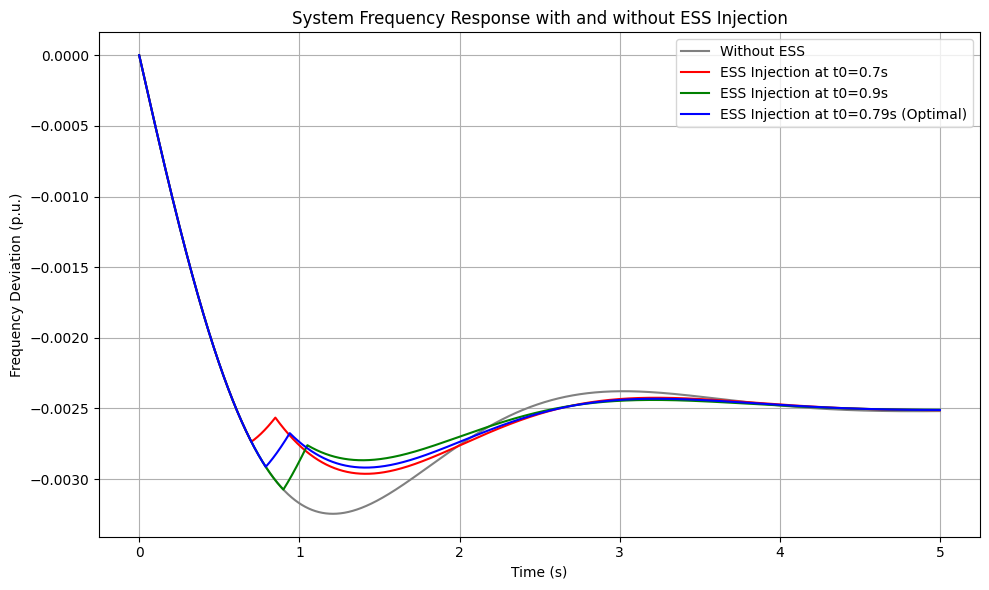

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
R = 0.05           # Droop
TG = 0.5           # Governor time constant (s)
H = 5              # Inertia constant (s)
D = 0              # Damping factor
t_end = 5          # Simulation time (s)
dt = 0.001         # Time step (s)
t = np.arange(0, t_end, dt)

# Load step frequency response
def fL(t):
    return -(1/400) * (1 + np.exp(-t) * (1/np.sqrt(3) * np.sin(np.sqrt(3)*t) - np.cos(np.sqrt(3)*t)))

# ESS response to power injection
def fs(t):
    return (3/2000) * (1 + np.exp(-t) * (1/np.sqrt(3) * np.sin(np.sqrt(3)*t) - np.cos(np.sqrt(3)*t)))

# Piecewise frequency response with ESS injection
def frequency_response(t, t0, dt_inj):
    t1 = t0 + dt_inj
    f_resp = np.zeros_like(t)

    for i, ti in enumerate(t):
        if ti <= t0:
            f_resp[i] = fL(ti)
        elif t0 < ti <= t1:
            f_resp[i] = fL(ti) + fs(ti - t0)
        else:
            f_resp[i] = fL(ti) + fs(ti - t0) - fs(ti - t1)

    return f_resp

# Compute frequency responses
f_nominal = fL(t)
f_ess_early = frequency_response(t, t0=0.7, dt_inj=0.15)
f_ess_late = frequency_response(t, t0=0.9, dt_inj=0.15)
f_ess_opt = frequency_response(t, t0=0.79, dt_inj=0.15)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, f_nominal, label='Without ESS', color='gray')
plt.plot(t, f_ess_early, label='ESS Injection at t0=0.7s', color='red')
plt.plot(t, f_ess_late, label='ESS Injection at t0=0.9s', color='green')
plt.plot(t, f_ess_opt, label='ESS Injection at t0=0.79s (Optimal)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Deviation (p.u.)')
plt.title('System Frequency Response with and without ESS Injection')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()